In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")


In [3]:
prosperLoan = pd.read_csv("prosperLoanData.csv")
FED_data = pd.read_csv("FEDFUNDS.csv")

In [4]:
prosperLoan.shape

(113937, 81)

In [5]:
prosperLoan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
FED_data.rename(columns={'observation_date' : 'Date','FEDFUNDS': 'fed_rate'}, inplace=True)
FED_data.head()


,Date,fed_rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [7]:
FED_data['Date'].dtype

dtype('O')

In [8]:
FED_data['Date'] = pd.to_datetime(FED_data['Date'])


In [9]:
FED_data['Date'].dt.is_month_start.all()

np.True_

In [10]:
start = FED_data['Date'].min()
end = FED_data['Date'].max()

expected = pd.period_range(start, end, freq='M').size
actual = len(FED_data)

expected, actual, start, end


(859, 859, Timestamp('1954-07-01 00:00:00'), Timestamp('2026-01-01 00:00:00'))

In [11]:
prosperLoan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [12]:
duplicate_Listing_Key = prosperLoan[
    prosperLoan.duplicated(subset='ListingKey', keep=False)
]
len(duplicate_Listing_Key)


1698

In [13]:
duplicate_Listing_Key = duplicate_Listing_Key.sort_values('ListingKey')


In [14]:
duplicate_Listing_Key['ListingKey'].value_counts()

ListingKey
17A93590655669644DB4C06    6
8474358854651984137201C    4
47C1359638497431975670B    4
349D3587495831350F0F648    4
DE8535960513435199406CE    4
                          ..
FE7436021001476584CACCD    2
FED53589115301546EB2BEB    2
FEF9358974260956441C450    2
FF1B3590569175597E6830C    2
05043603291539396A9E43E    2
Name: count, Length: 827, dtype: int64

In [15]:
duplicate_Listing_Key.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
32680,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,...,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32681,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,...,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32964,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,...,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
17274,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,...,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7478,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
33220,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
27677,01163604029146842E28D9C,1233732,2014-02-25 14:33:39.830000000,NaN,36,Current,NaN,0.31975,0.2800,0.2700,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
788,01163604029146842E28D9C,1233732,2014-02-25 14:33:39.830000000,NaN,36,Current,NaN,0.31975,0.2800,0.2700,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
27360,014F35910923350802E1B29,930618,2013-09-26 16:44:24.163000000,NaN,60,Current,NaN,0.19323,0.1695,0.1595,...,-27.50,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
18324,014F35910923350802E1B29,930618,2013-09-26 16:44:24.163000000,NaN,60,Current,NaN,0.19323,0.1695,0.1595,...,-27.50,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [16]:
prosperLoan = prosperLoan.drop_duplicates(subset='ListingKey', keep='first')



In [17]:
duplicate_Listing_Key = prosperLoan[
    prosperLoan.duplicated(subset='ListingKey', keep=False)
]
len(duplicate_Listing_Key)

0

In [18]:
duplicate_Loan_Key = prosperLoan[
    prosperLoan.duplicated(subset='LoanKey', keep=False)
]
len(duplicate_Loan_Key)

0

In [19]:
cols_to_use = [
    'LoanOriginationDate',   # Time alignment
    'BorrowerRate',          # Primary comparison metric
    'BorrowerAPR',           # Secondary comparison metric
    'ProsperRating (Alpha)', # To segment by risk
    'Term',                  # To segment by loan length
    'LoanOriginalAmount',    # To check borrowing volume
    'CreditScoreRangeLower', # To check borrower quality
    'CreditScoreRangeUpper'  # To check borrower quality
]

prosperLoan_filtered =  prosperLoan[cols_to_use]

In [20]:
prosperLoan_filtered.isna().sum()



LoanOriginationDate          0
BorrowerRate                 0
BorrowerAPR                 25
ProsperRating (Alpha)    29084
Term                         0
LoanOriginalAmount           0
CreditScoreRangeLower      591
CreditScoreRangeUpper      591
dtype: int64

In [21]:
prosperLoan_filtered.shape

(113066, 8)

In [22]:
prosperLoan_filtered.head(5)

,LoanOriginationDate,BorrowerRate,BorrowerAPR,ProsperRating (Alpha),Term,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper
0,2007-09-12 00:00:00,0.1580,0.16516,NaN,36,9425,640.0,659.0
1,2014-03-03 00:00:00,0.0920,0.12016,A,36,10000,680.0,699.0
2,2007-01-17 00:00:00,0.2750,0.28269,NaN,36,3001,480.0,499.0
3,2012-11-01 00:00:00,0.0974,0.12528,A,36,10000,800.0,819.0
4,2013-09-20 00:00:00,0.2085,0.24614,D,36,15000,680.0,699.0


In [23]:
prosperLoan_filtered.dtypes

LoanOriginationDate       object
BorrowerRate             float64
BorrowerAPR              float64
ProsperRating (Alpha)     object
Term                       int64
LoanOriginalAmount         int64
CreditScoreRangeLower    float64
CreditScoreRangeUpper    float64
dtype: object

In [24]:
prosperLoan_filtered['LoanOriginationDate'] = pd.to_datetime(prosperLoan_filtered['LoanOriginationDate'])

# Sort from oldest to newest
prosper_Loan_processed = prosperLoan_filtered.sort_values(by='LoanOriginationDate')

C:\Users\sayan\AppData\Local\Temp\ipykernel_9924\3967695400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosperLoan_filtered['LoanOriginationDate'] = pd.to_datetime(prosperLoan_filtered['LoanOriginationDate'])


In [25]:
FED_data['Month'] = FED_data['Date'].dt.to_period('M')


In [26]:
FED_data['Month'].dtype

period[M]

In [27]:
assert FED_data['Month'].is_unique

In [28]:
prosper_Loan_processed['Month'] = prosper_Loan_processed['LoanOriginationDate'].dt.to_period('M')
 

In [29]:
prosper_Loan_processed['Month'].value_counts

<bound method IndexOpsMixin.value_counts of 113921    2005-11
62297     2005-11
73945     2005-11
78414     2005-11
25166     2005-11
           ...   
32376     2014-03
18444     2014-03
16984     2014-03
107547    2014-03
57518     2014-03
Name: Month, Length: 113066, dtype: period[M]>

In [30]:
prosperLoan_FED = pd.merge(
    prosper_Loan_processed,
    FED_data[['Month', 'fed_rate']],
    on='Month',
    how='left'
)


In [31]:
prosperLoan_FED.columns

Index(['LoanOriginationDate', 'BorrowerRate', 'BorrowerAPR',
       'ProsperRating (Alpha)', 'Term', 'LoanOriginalAmount',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'Month', 'fed_rate'],
      dtype='object')

In [32]:
prosperLoan_FED.dtypes

LoanOriginationDate      datetime64[ns]
BorrowerRate                    float64
BorrowerAPR                     float64
ProsperRating (Alpha)            object
Term                              int64
LoanOriginalAmount                int64
CreditScoreRangeLower           float64
CreditScoreRangeUpper           float64
Month                         period[M]
fed_rate                        float64
dtype: object

In [33]:
prosperLoan_FED.shape

(113066, 10)

In [34]:
aggregations = {
    'BorrowerRate': ['mean', 'median', 'std'],      # The "Cost" of borrowing
    'BorrowerAPR': ['mean'],                        # Total cost including fees
    'LoanOriginalAmount': ['sum', 'mean', 'count'], # Market volume and demand
    'CreditScoreRangeLower': ['mean'],
    'fed_rate': ['mean']
}

prosperLoan_monthly = prosperLoan_FED.groupby('Month', as_index = False).agg(aggregations)


In [35]:
prosperLoan_monthly.columns = ['_'.join(col).strip() for col in prosperLoan_monthly.columns.values]

In [36]:
prosperLoan_monthly = prosperLoan_monthly.rename(columns={'fed_rate_mean' : 'fed_rate', 'Month_' : 'Month'})

In [37]:
prosperLoan_monthly.columns



Index(['Month', 'BorrowerRate_mean', 'BorrowerRate_median', 'BorrowerRate_std',
       'BorrowerAPR_mean', 'LoanOriginalAmount_sum', 'LoanOriginalAmount_mean',
       'LoanOriginalAmount_count', 'CreditScoreRangeLower_mean', 'fed_rate'],
      dtype='object')

In [38]:
prosperLoan_monthly['Month'] = prosperLoan_monthly['Month'].dt.to_timestamp()


In [39]:
fed_col = 'fed_rate'

other_cols = [
    c for c in prosperLoan_monthly.columns
    if c not in ['Month', fed_col]
]


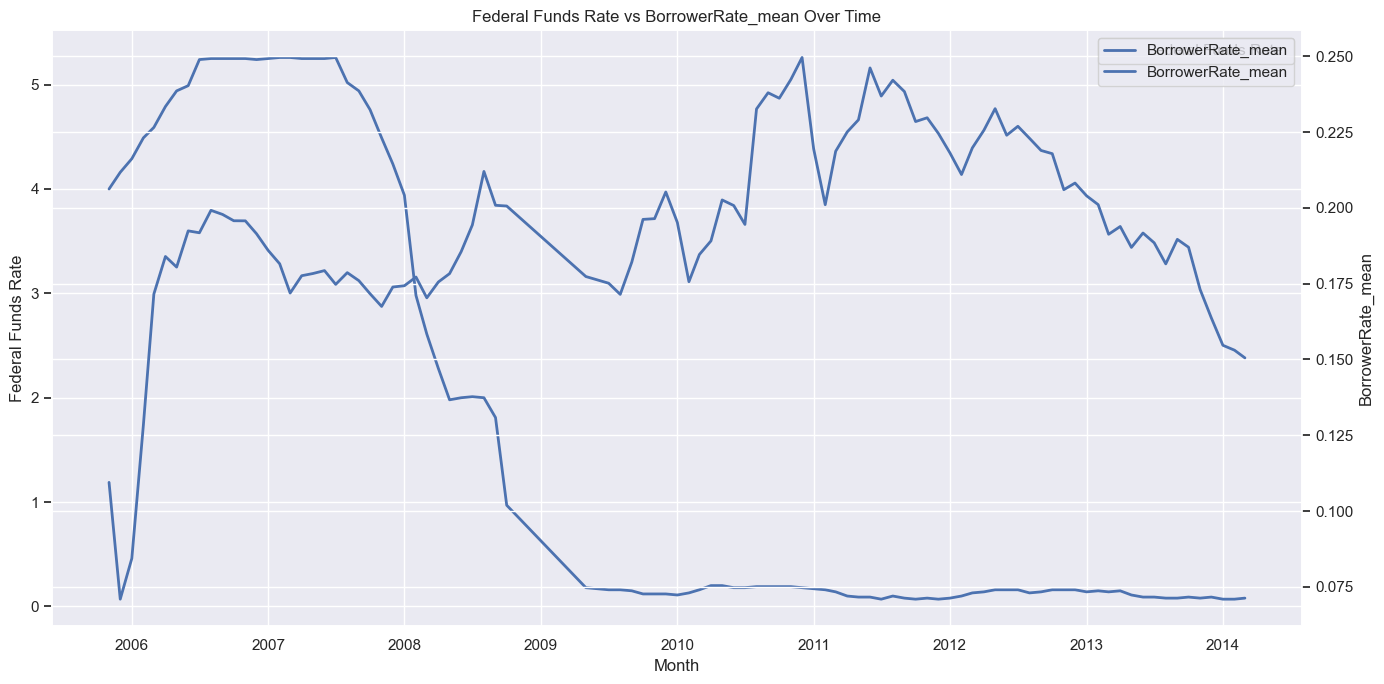

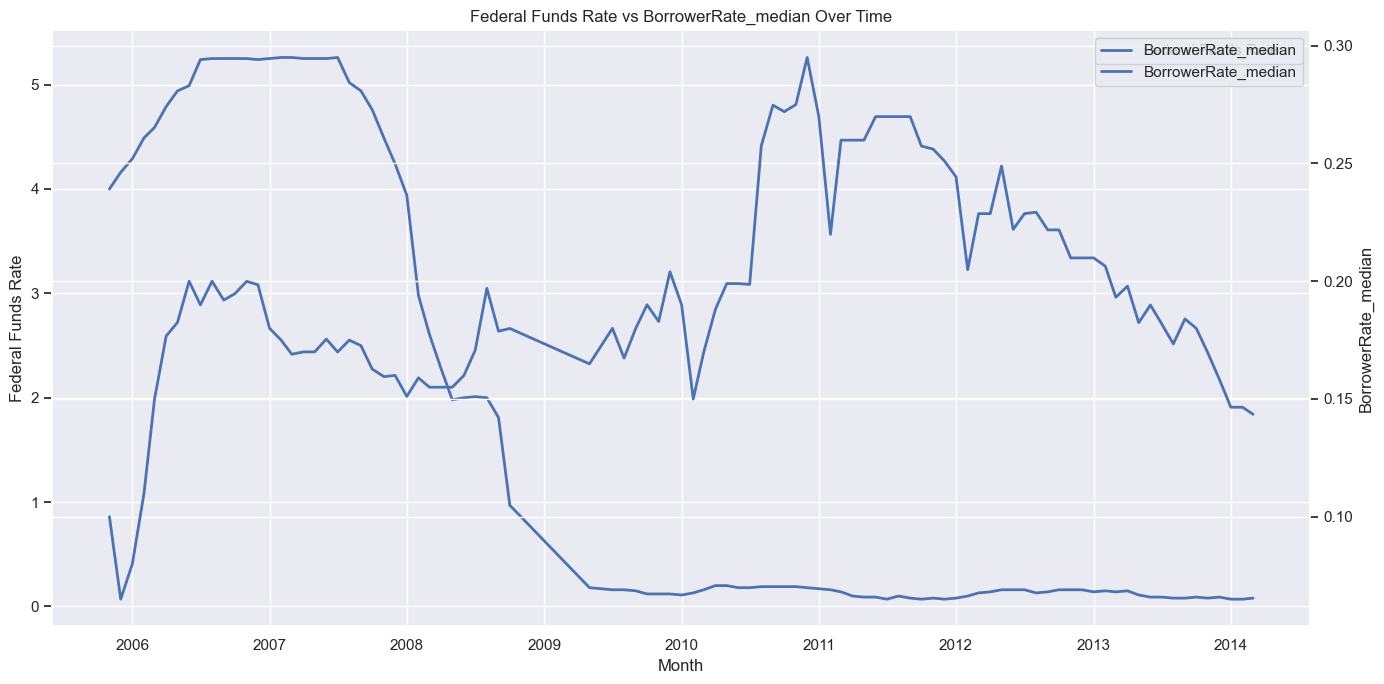

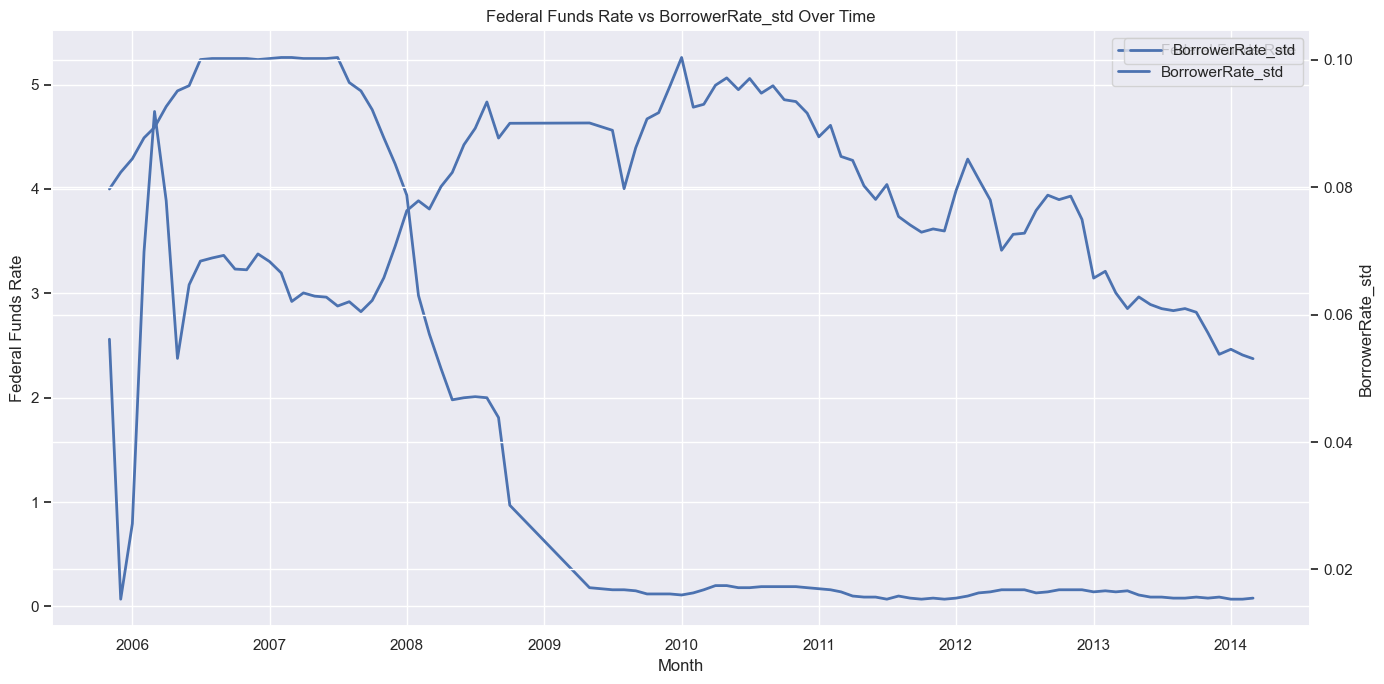

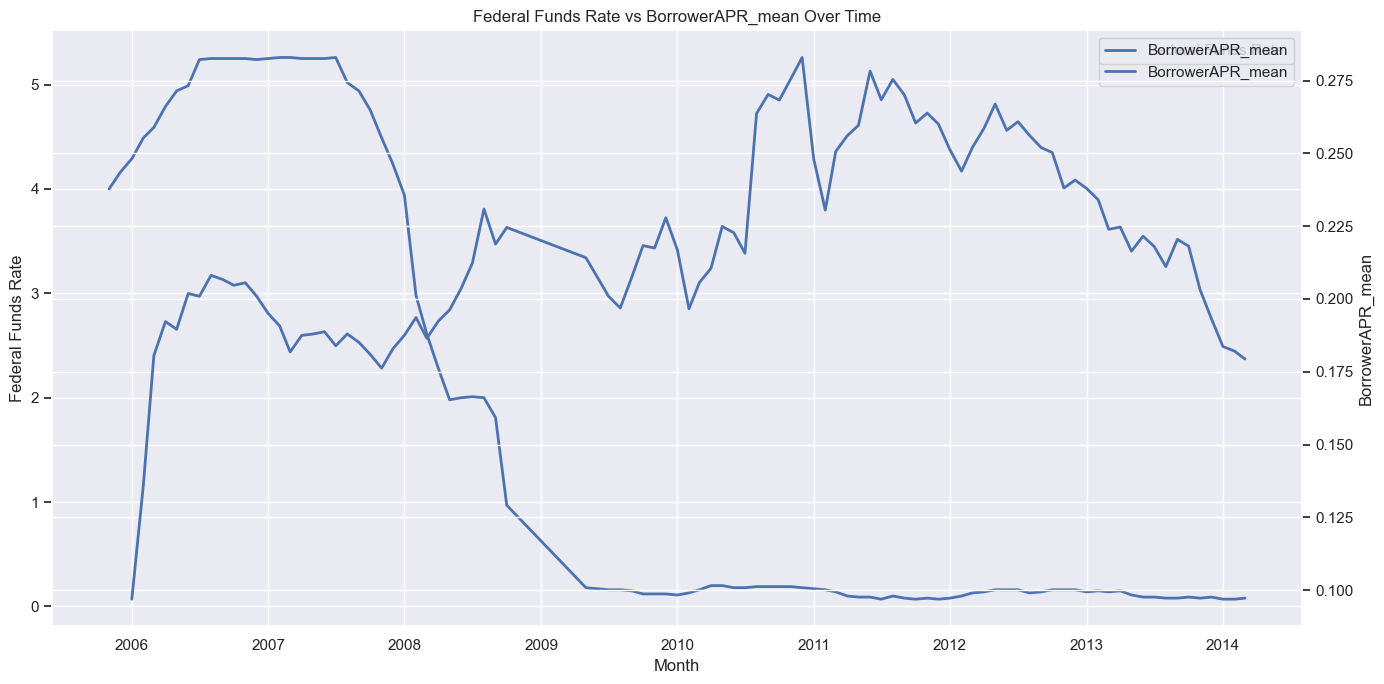

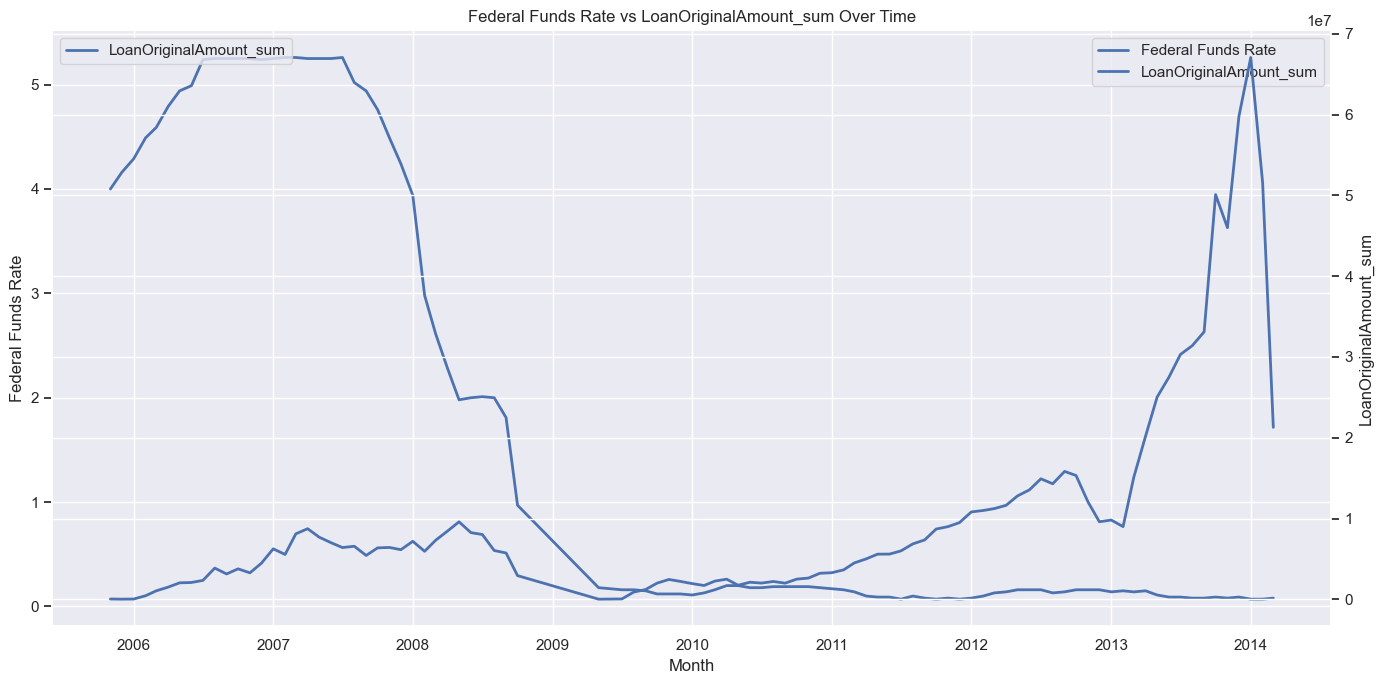

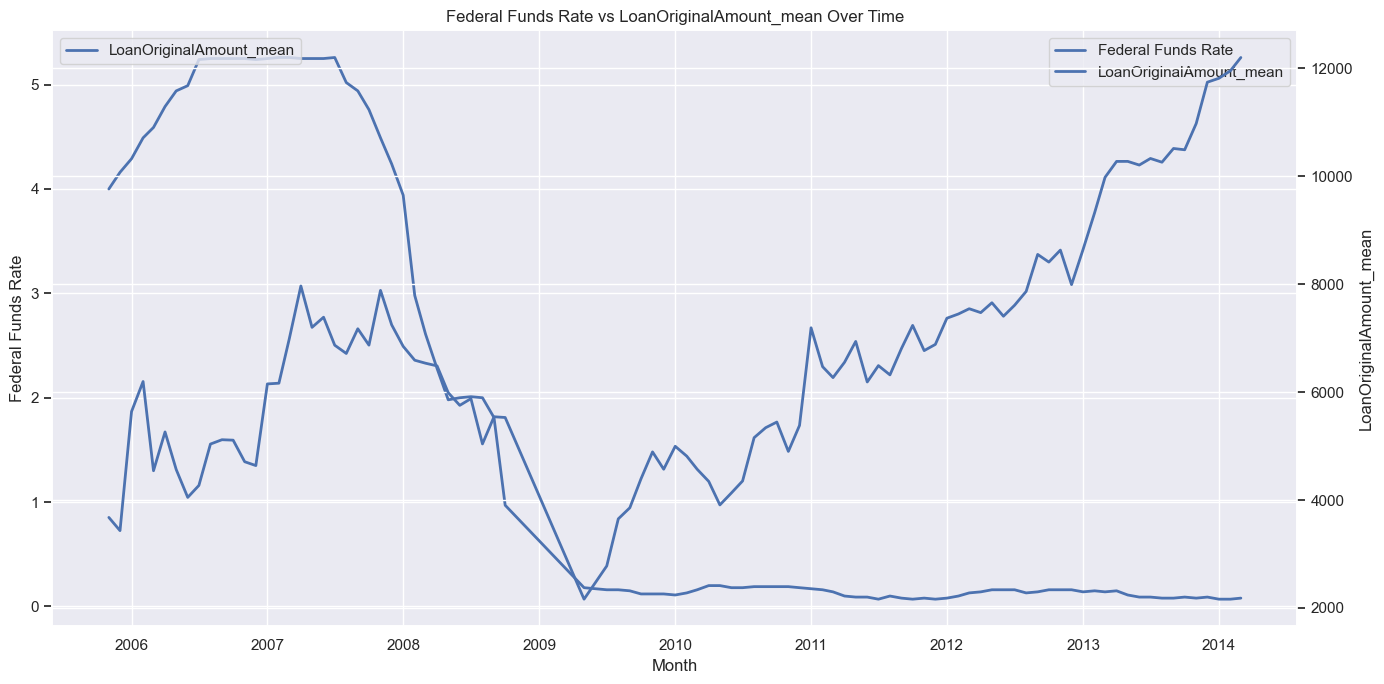

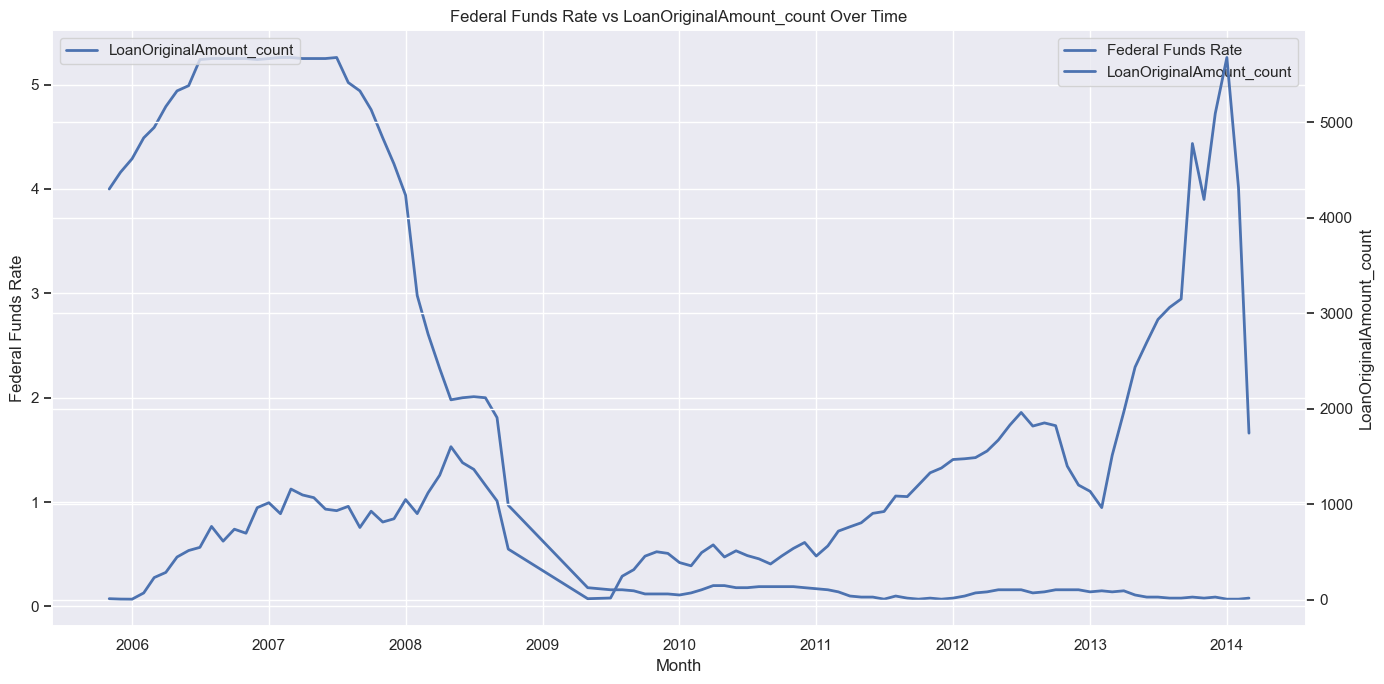

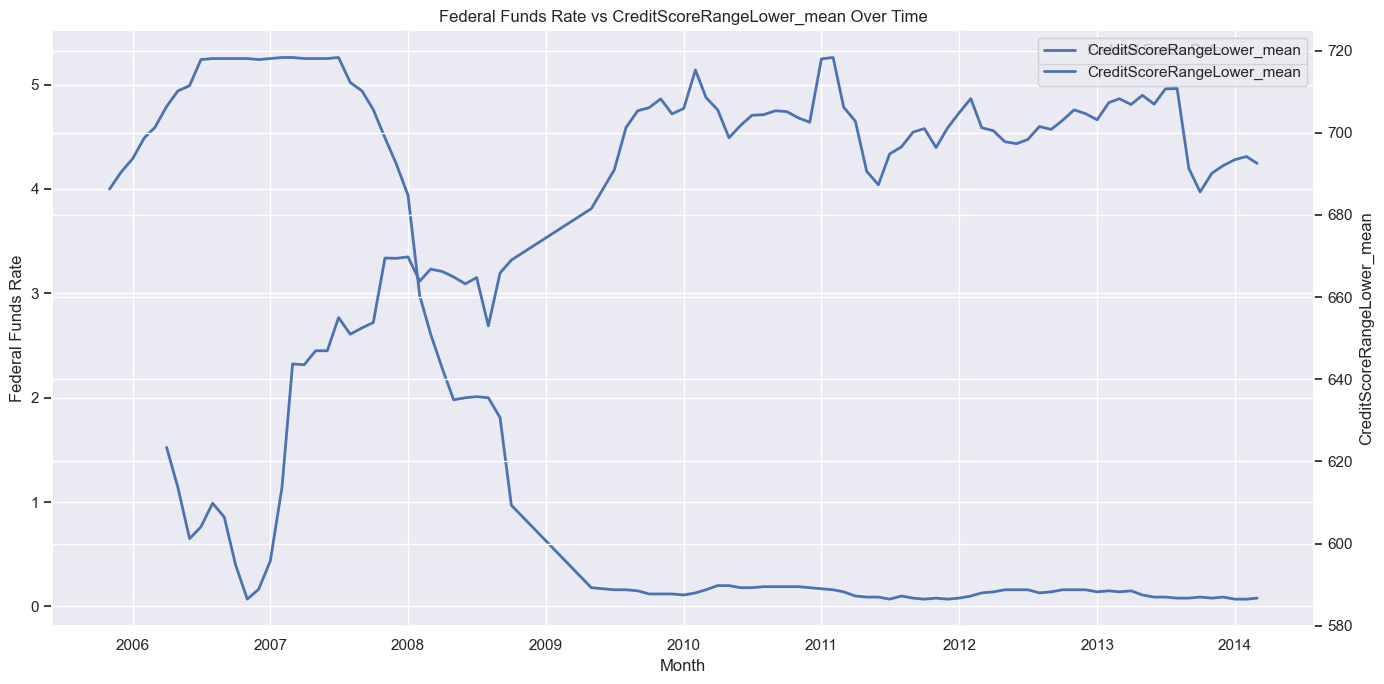

In [40]:
for col in other_cols:
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Left axis: Fed rate
    sns.lineplot(
        data=prosperLoan_monthly,
        x='Month',
        y=fed_col,
        ax=ax1,
        label='Federal Funds Rate',
        linewidth=2
    )

    ax1.set_ylabel('Federal Funds Rate')
    ax1.set_xlabel('Month')

    # Right axis: other variable
    ax2 = ax1.twinx()
    sns.lineplot(
        data= prosperLoan_monthly,
        x='Month',
        y=col,
        ax=ax2,
        label=col,
        linewidth=2
    )

    ax2.set_ylabel(col)

    # Title
    plt.title(f'Federal Funds Rate vs {col} Over Time')

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

    plt.tight_layout()
    plt.show()


In [41]:
correlations = (
    prosperLoan_monthly[[fed_col] + other_cols]
    .corr()[fed_col]
    .drop(fed_col)
    .sort_values(ascending=False)
)

print("Correlation with Fed Rate:")
print(correlations)


Correlation with Fed Rate:
LoanOriginalAmount_mean      -0.275407
LoanOriginalAmount_count     -0.306224
LoanOriginalAmount_sum       -0.308133
BorrowerRate_std             -0.407058
BorrowerRate_mean            -0.473750
BorrowerRate_median          -0.477427
BorrowerAPR_mean             -0.638156
CreditScoreRangeLower_mean   -0.911615
Name: fed_rate, dtype: float64


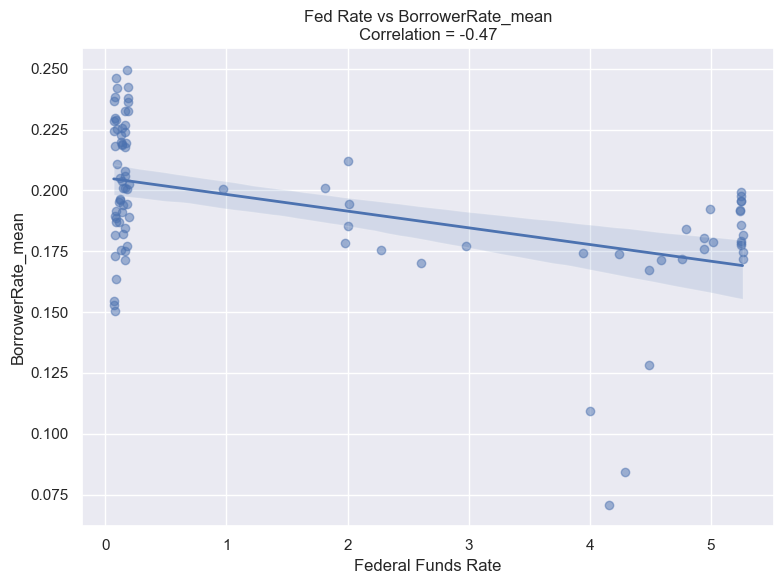

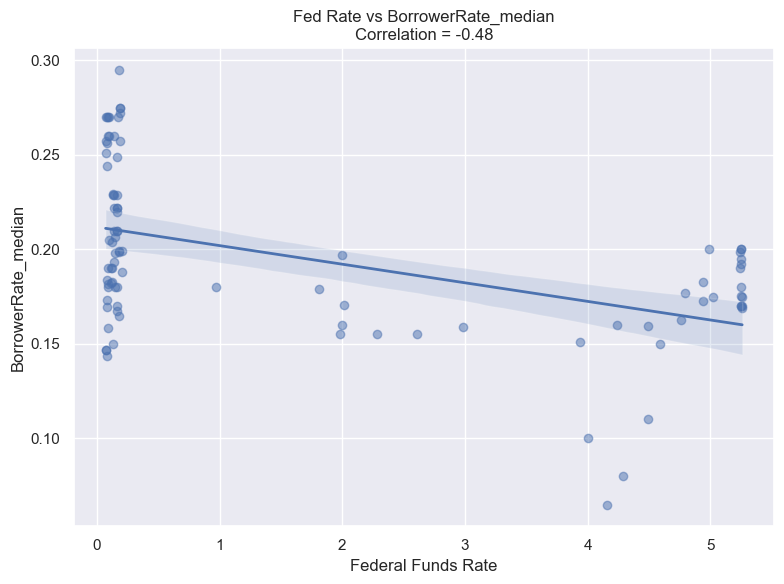

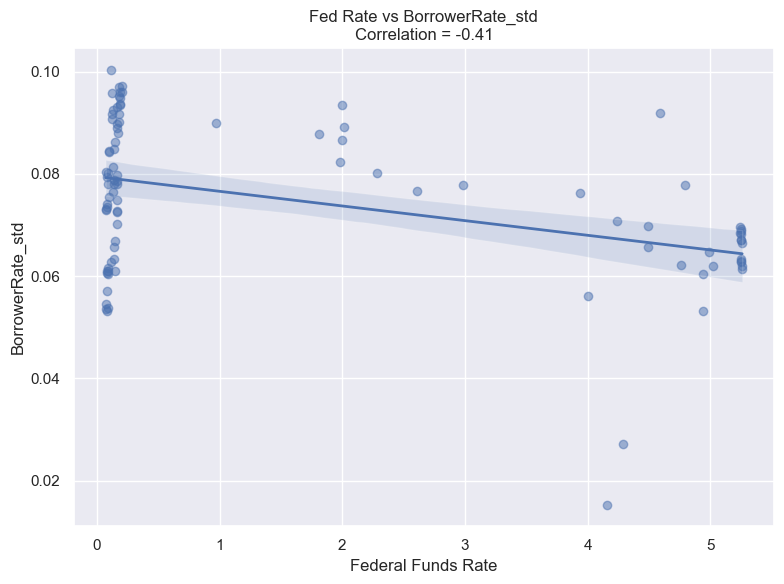

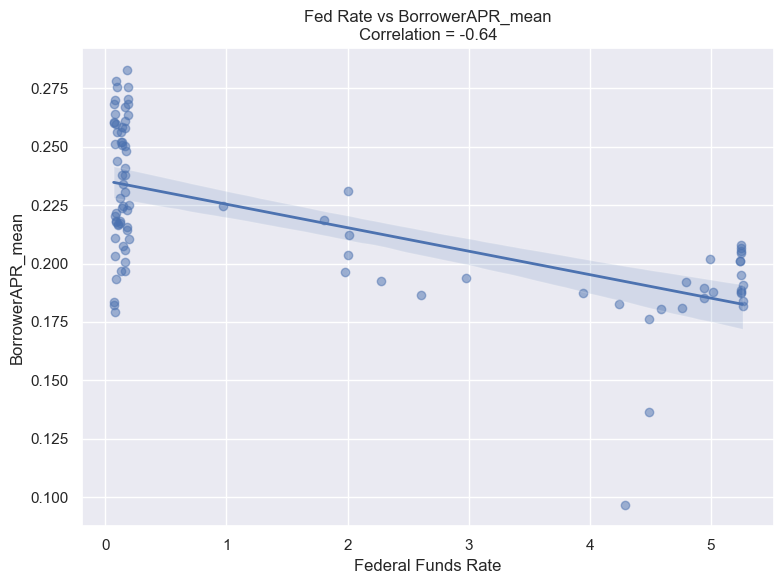

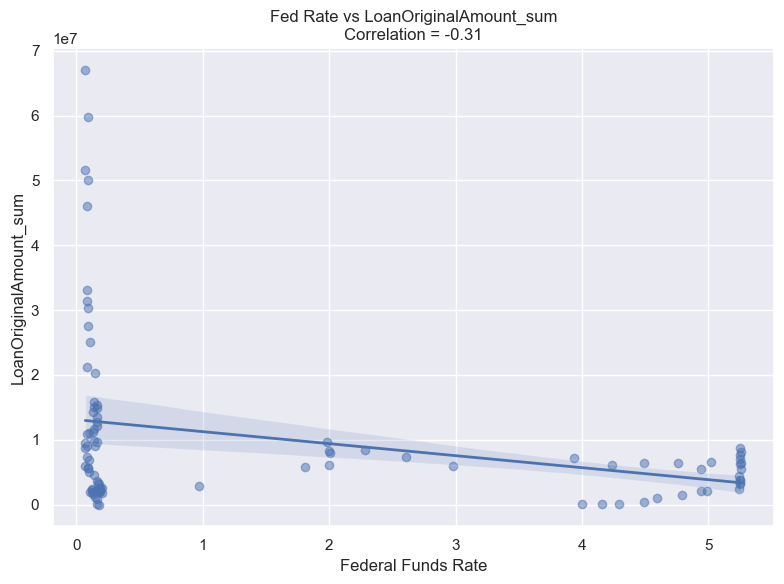

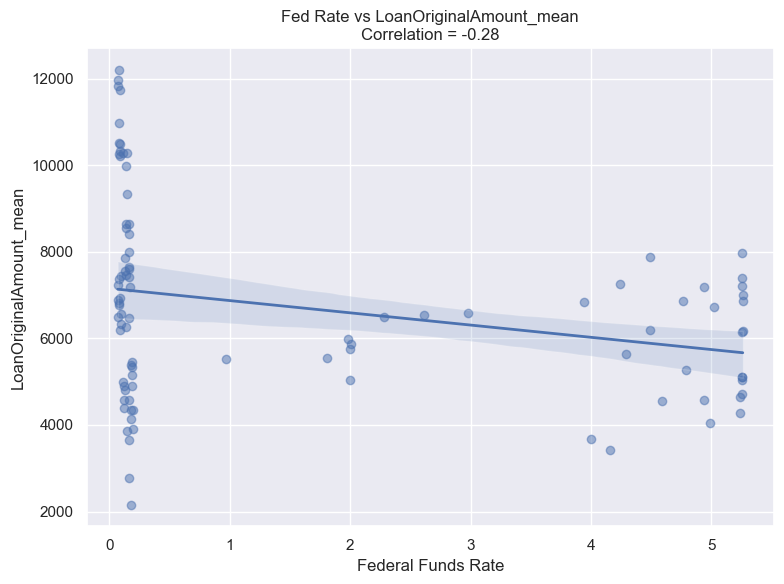

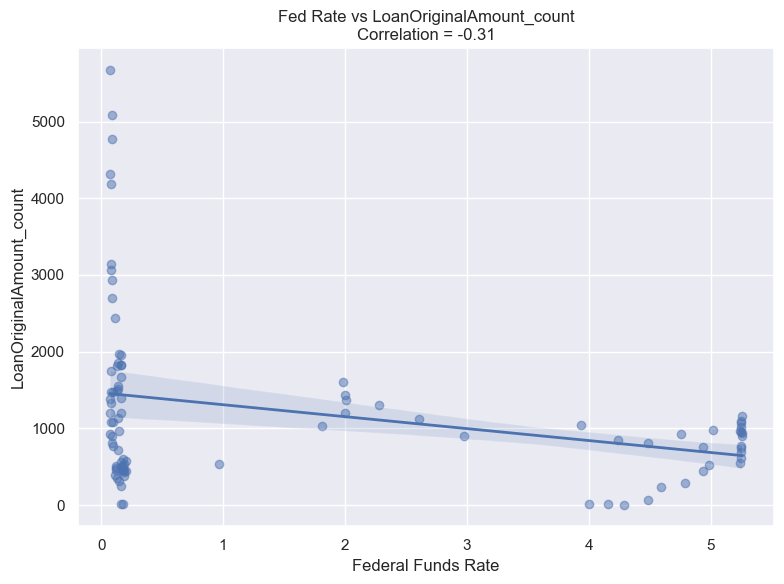

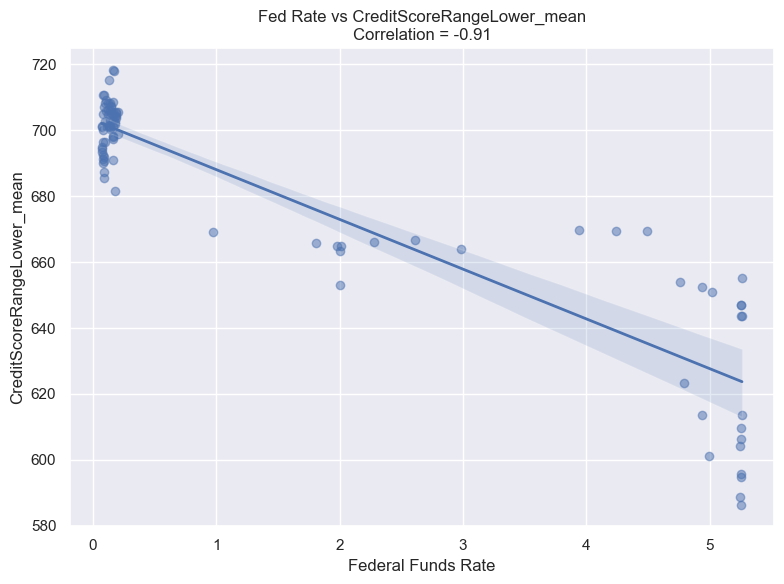

In [42]:
for col in other_cols:
    plt.figure(figsize=(8, 6))

    sns.regplot(
        data=prosperLoan_monthly,
        x=fed_col,
        y=col,
        scatter_kws={'alpha': 0.5},
        line_kws={'linewidth': 2}
    )

    corr_val = prosperLoan_monthly[[fed_col, col]].corr().iloc[0, 1]

    plt.title(f'Fed Rate vs {col}\nCorrelation = {corr_val:.2f}')
    plt.xlabel('Federal Funds Rate')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


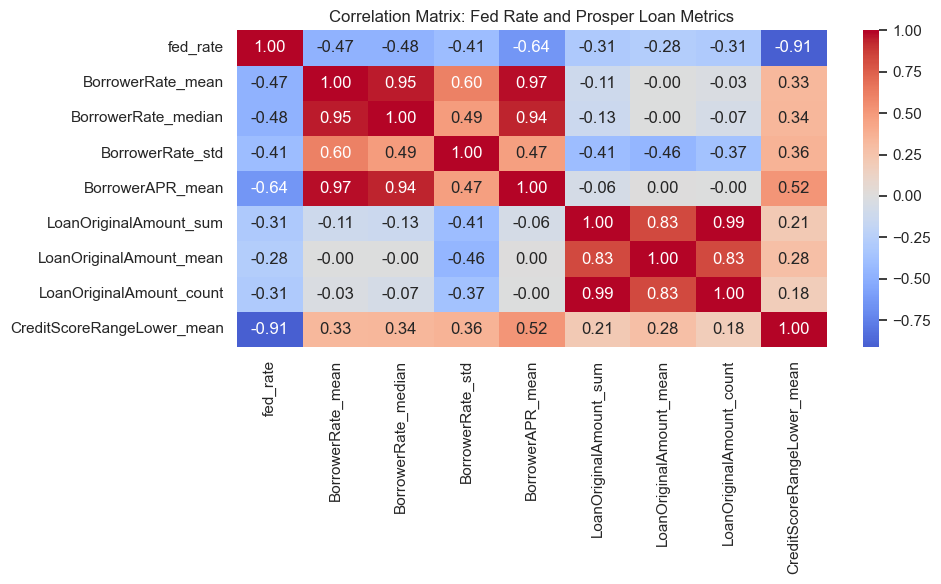

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    prosperLoan_monthly[[fed_col] + other_cols].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    center=0
)
plt.title('Correlation Matrix: Fed Rate and Prosper Loan Metrics')
plt.tight_layout()
plt.show()


In [44]:
prosperLoan_monthly.columns

Index(['Month', 'BorrowerRate_mean', 'BorrowerRate_median', 'BorrowerRate_std',
       'BorrowerAPR_mean', 'LoanOriginalAmount_sum', 'LoanOriginalAmount_mean',
       'LoanOriginalAmount_count', 'CreditScoreRangeLower_mean', 'fed_rate'],
      dtype='object')

In [46]:
prosperLoan_interest_rate = prosperLoan_monthly[['Month', 'BorrowerRate_mean', 'fed_rate']]

In [47]:
tbill = pd.read_csv("tbill_train.csv")


In [48]:
tbill.columns

Index(['observation_date', 'TB3MS'], dtype='object')

In [52]:
tbill.head

<bound method NDFrame.head of     observation_date  TB3MS
0         2001-01-01   5.15
1         2001-02-01   4.88
2         2001-03-01   4.42
3         2001-04-01   3.87
4         2001-05-01   3.62
..               ...    ...
235       2020-08-01   0.10
236       2020-09-01   0.11
237       2020-10-01   0.10
238       2020-11-01   0.09
239       2020-12-01   0.09

[240 rows x 2 columns]>

In [54]:
tbill['Date'] = pd.to_datetime(tbill['observation_date'])


In [ ]:
tbill['Month'] = tbill['Date'].dt.to_period('M')
tbill['Month'] =  
